# Practical 3: Groundwater Composition in Nepal

In this practical, you'll be working with the dataset containing groundwater composition data from a village in Nepal. We went through the first part of this practical in the lecture, so should look very familiar. The second section will go beyond where we got to in the lecture, and look at fitting some models to the data.

The dataset is available in the Microsoft Excel file [here](https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M3_well_data.xlsx) (link also provided below).

## Import the Data

Use `pandas` to import the data from the Excel file into a variable called `well_data`, and make sure it's in a format that you can work with.

> **Hint**: You'll need to think about the file header, makind `pandas` recognise the row names as the 'index' of the data, and do something about the data being in rows vs. columns.

In [ ]:
data_url = 'https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M3_well_data.xlsx'

In [ ]:
# do it here
import pandas as pd
well_data=pd.read_excel('https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M3_well_data.xlsx', skiprows=2)
well_data.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,km,0.000000,0.150499,0.307996,0.442894,0.590801,0.746636,0.913452,1.034335,1.210207,...,6.595494,6.749555,6.904201,7.053161,7.210575,7.337579,7.514542,7.644615,7.812671,7.964630
1,Ca,0.000000,0.039022,0.071764,0.063035,0.098939,0.101851,0.113450,0.115354,0.201689,...,0.821972,0.873568,0.869113,0.884913,0.916302,0.898351,0.933622,0.979051,1.005570,1.019735
2,Mg,0.022515,0.024379,0.030639,0.025230,0.020031,0.025306,0.034180,0.048325,0.040213,...,0.092931,0.089368,0.090798,0.108905,0.104600,0.099736,0.100850,0.102130,0.102203,0.109741
3,As,0.003816,0.005255,0.007220,0.000000,0.003892,0.003190,0.000596,0.000000,0.002285,...,0.034396,0.030901,0.040430,0.046008,0.044113,0.042508,0.040070,0.045648,0.046068,0.045013
4,Fe2+,0.000000,0.000000,0.002556,0.016828,0.000000,0.018734,0.010843,0.000000,0.000000,...,0.296095,0.329088,0.335281,0.339137,0.374341,0.376964,0.397784,0.396810,0.406868,0.416241


## Plot the Data

In the lecture, we introduced you to three types of behaviour in these elements:

 - Mg and Ca are dissolving from (Ca,Mg)CO<sub>3</sub> minerals in the sub-surface.
 - As, Fe2+ and Cr are leached from minerals by redox processes in the subsurface, which only occur in anoxic (oxygen-free) conditions.
 - Cr is also being added to the groundwater by a pollution source.

Use the Advanced Plotting skills you learned in the last practical to create a figure containing three, vertically-arranged subplots with a shared x-axis. Plot all the elements in the dataset on these plots, divided by the dominant process that controls their concentration in the groundwater: dissolution in the top panel, redox in the middle panel, and pollution in the bottom panel. Which plot should you put lead (Pb) on?

Add a title to each plot identifying the dominant process, and remember to label your axes!

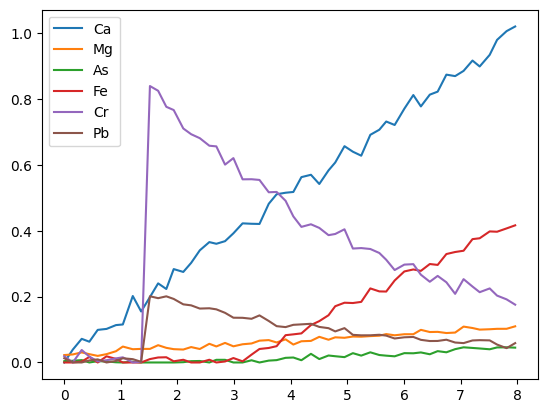

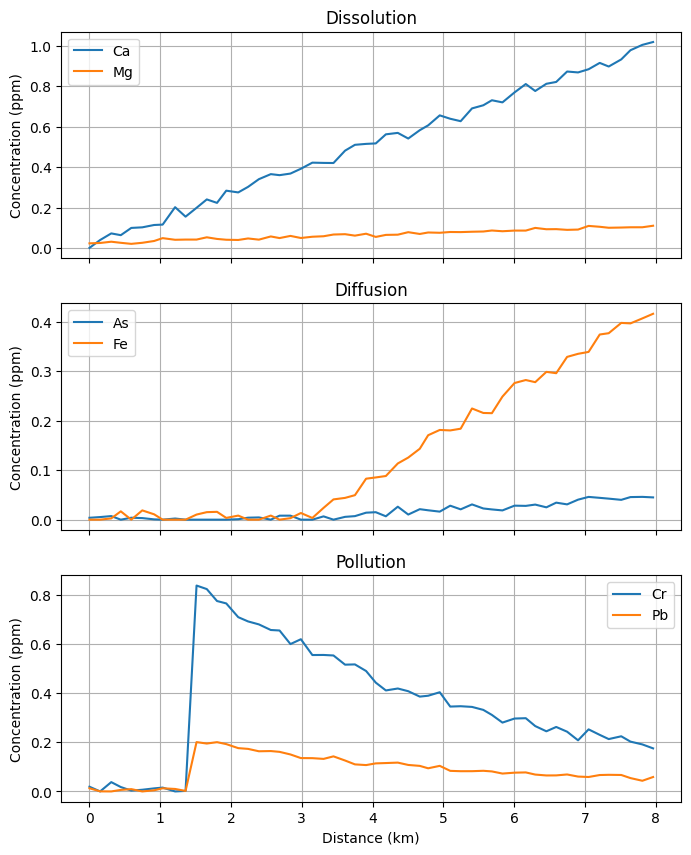

In [ ]:
# do it here
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

distance=well_data.iloc[0].to_numpy()[1:]
Ca=well_data.iloc[1].to_numpy()[1:]
Mg=well_data.iloc[2].to_numpy()[1:]
As=well_data.iloc[3].to_numpy()[1:]
Fe=well_data.iloc[4].to_numpy()[1:]
Cr=well_data.iloc[5].to_numpy()[1:]
Pb=well_data.iloc[6].to_numpy()[1:]

plt.plot(distance, Ca, label='Ca')
plt.plot(distance, Mg, label='Mg')
plt.plot(distance, As, label='As')
plt.plot(distance, Fe, label='Fe')
plt.plot(distance, Cr, label='Cr')
plt.plot(distance, Pb, label='Pb')
plt.legend()
plt.show()


fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)
ax0, ax1, ax2 = axs
ax0.grid(True)
ax1.grid(True)
ax2.grid(True)


#dissolution
ax0.plot(distance, Ca, label='Ca')
ax0.plot(distance, Mg, label='Mg')
ax0.set_title('Dissolution')
ax0.set_ylabel('Concentration (ppm)')
ax0.legend()

#diffusion
ax1.plot(distance, As, label='As')
ax1.plot(distance, Fe, label='Fe')
ax1.set_title('Diffusion')
ax1.set_ylabel('Concentration (ppm)')
ax1.legend()




#pollution

ax2.plot(distance,Cr,label='Cr')
ax2.plot(distance,Pb,label='Pb')
ax2.set_title('Pollution')
ax2.set_ylabel('Concentration (ppm)')
ax2.legend()

plt.xlabel('Distance (km)')
plt.show()






For the rest of this practical, we will dig a bit deeper into this dataset, and consider:
1. Is the Ca and Mg really dissolving from minerals?
2. How far down the flow-path does the groundwater start becoming anoxic?
3. Where is the pollution source?

## 1. Dissolution and Mineral Composition

We have told you that Mg and Ca most likely come from dissolving (Ca,Mg)CO<sub>3</sub> minerals in the subsurface... but can we also see that in the data?

Some Geochemists have been working in the area, and sampled a number of the rocks underlying the village. They have found that the (Ca,Mg)CO<sub>3</sub> minerals in the area contain 3-4 wt% Mg and 33-36 wt% Ca, with the rest being CO<sub>3</sub>.

If the Ca and Mg in the groundwater are coming from these minerals, we would expect the ratio of dissolved Mg:Ca in the groundwater to be the same as the ratio of Mg:Ca in the minerals.

To investigate this, you can create a scatter plot of Ca concentration vs. Mg concentration in the groundwater. The slope of this relationship is the Mg:Ca ratio of the dissolved ions.

Create a scatter plot of Ca concentration vs. Mg concentration in the groundwater

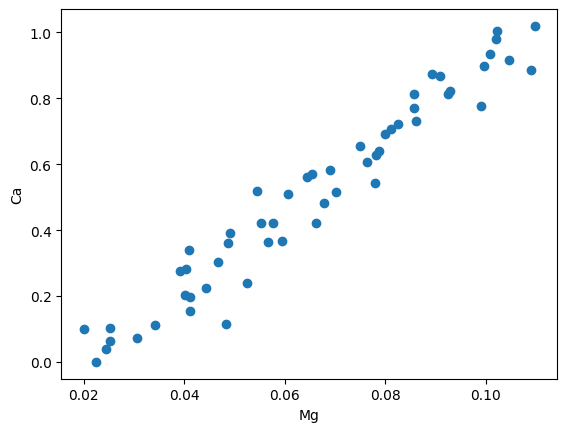

In [ ]:
# do it here
plt.scatter(Mg,Ca)
plt.xlabel('Mg')
plt.ylabel('Ca')
plt.show()


You should be able to tell by looking at this plot that the Mg:Ca ratio is around 0.1. But how can we quantify this?

### Line of Best Fit

To do this, we want to calculate the **slope** of the line using a **linear regression**. This is a statistical technique that fits a line to the data, and tells us the slope of that line. What we're about to do is equivalent to clicking the 'trendline' button in Excel, but we're going to do it in Python!

The exact method we're about to use is known as [polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression), which allows us to fit an arbitrary polynomial to some data. There is a convenient function for doing this called `polyfit` (`poly`nomial `fit`) in the `numpy` package. After you've imported `numpy` as `np`, you can use it like this:

```python
np.polyfit(xdata, ydata, deg=1)
```

where `deg` tells it the *degree* of the polynomial we want to fit. `deg=1` is a first order polynomial, i.e. a straight line with the form $y = mx + c$.

The [function documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) tells us that it will return an array of `deg + 1` parameters, with the highest order first. In this case, we expect 2 parameters containing `(slope, intercept)` of the line of best fit.

Fit a first-order polynomial to the Ca and Mg data, and store the best-fit parameters in a new variable called `p`.

In [ ]:
# do it here
Mg = Mg.astype(float)
Ca = Ca.astype(float)
p=np.polyfit(Mg,Ca,deg=1)

What is the slope of the Ca vs. Mg relationship? Is it consistent with dissolution from the (Ca,Mg)CO<sub>3</sub> minerals?



In [ ]:
# do it here
print(p)

[11.26657547 -0.22795167]


Now you've calculated the best fit parameters, it's useful to be able to show the line on the plot (like you get when you look at the 'trendline' in Excel).

There are two steps to do this:
1. Create a new x variable that we want to calculate the trendline over (use the `np.linspace()` function).
2. Calculate the y values for the trendline using the best-fit parameters (use `np.polyval()`, which does the inverse of `polyfit`).

Use this approach to create a new x variable, and calculate predicted y values for the trendline. Then plot the trendline on the plot.

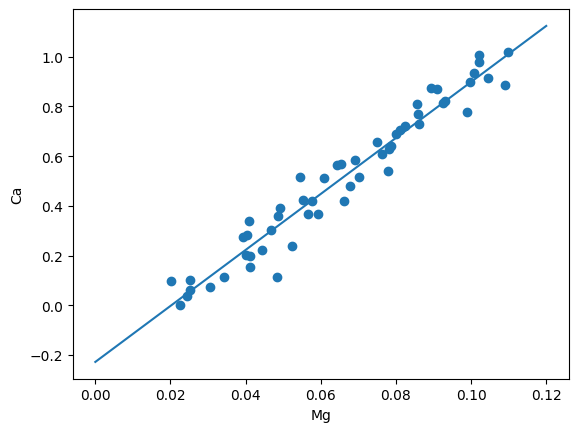

In [ ]:
# do it here
x=np.linspace(0,0.12,100)
y=np.polyval(p,x)
plt.scatter(Mg,Ca)
plt.plot(x,y)
plt.xlabel('Mg')
plt.ylabel('Ca')
plt.show()

You can now create a 'line of best fit' for any dataset you want!

## 2. Where does the water become anoxic?

We saw in the plot above that As and Fe2+ only start increasing in the water after a certain distance down the flowpath. We can see just by looking at this plot that this transition happens at around 3 km along the flowpath... but when *exactly* does it start increasing?

We can also answer this with... linear regression! This time, we're interested in finding the zero-intercept of the increasing trend in As and Fe2+ concentrations. Before we can do this, we need to isolate the data where the concentrations are increasing using a **boolean mask** (you saw this briefly in the 'Selecting Data' section of the last practical).

We know that the data start increasing at around 3km, so to isolate increasing data we can select only the data where the distance along the flow path is *greater than* around 3.5km. You can create an index to use in the `.loc[]` operator like this:

```python
ind = well_data.index > 3.5
```

Two tasks here:
1. Fit a line to distance vs. the As and Fe2+ data using `polyfit`, only considering the region where distance > 3.5km. Add trendlines to the plot of As and Fe changing with distance.
2. Given that the `polyfit` function with `deg=1` gives you `(slope, intercept)`, calculate the distance along the flowpath where the As and Fe2+ concentrations start increasing (i.e. where $y = 0$). Show these distances as vertical lines on the plot.

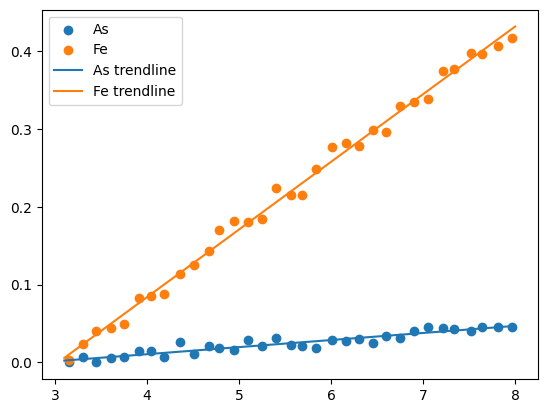

[ 0.00909507 -0.0257376 ]


In [ ]:
# do it here
ind = distance > 3.1  # Create the boolean mask based on distance values
distance = distance.astype(float)

As = As.astype(float)
Fe = Fe.astype(float)

p_as = np.polyfit(distance[ind], As[ind], deg=1)
p_fe = np.polyfit(distance[ind], Fe[ind], deg=1)

plt.scatter(distance[ind], As[ind], label='As')
plt.scatter(distance[ind], Fe[ind], label='Fe')

x=np.linspace(3.1,8,100)
y=np.polyval(p_as,x)
plt.plot(x,y,label='As trendline')
y=np.polyval(p_fe,x)
plt.plot(x,y,label='Fe trendline')
plt.legend()

plt.show()
print (p_as)

def find_zero_intercept(p):
    return -p[1] / p[0]



Are the numbers you calculate from As and Fe data the same? If not, which one do you think is more accurate and why?

## 3. Where is the pollution source?

Identifying the location source is a similar problem to the one above, but we can't tackle it in the same way because there is no linear increase for us to fit a line to. How do we do it?

This is actually a much simpler problem, because the pollution source is a **point source** - it is only added to the groundwater at one point, and then it diffuses away from that point as it flows along the flowpath. In the data, this means that elements associated with pollution suddenly appear in the data at a single point, after which the concentration gradually decreases.

We should therefore be able to identify the location of the pollution source by identifying the maximum *rate of change* of the data (i.e. the first dervative, $\frac{dC}{dz}$, where $C$ is concentration and $z$ is distance along the flowpath).

`pandas` has a convenient built-in method for calculating the difference between rows of a dataset called `.diff()`. Use this to calculate the change in concentration between each row of the dataset, and then plot this against distance along the flowpath for all elements affected by pollution.

> **Hint**: You'll want to save the output of `.diff()` to a new variable.

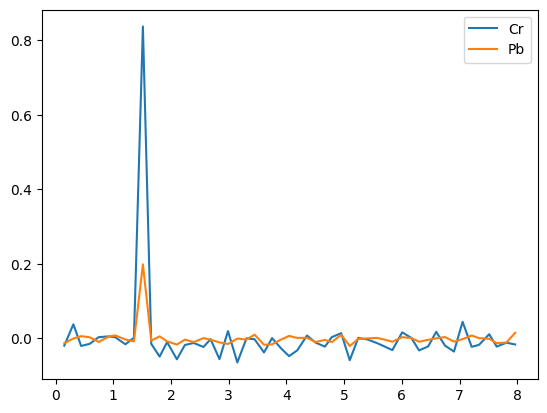

In [ ]:
# do it here
diff_cr=np.diff(Cr)
diff_pb=np.diff(Pb)

plt.plot(distance[1:],diff_cr,label='Cr')
plt.plot(distance[1:],diff_pb,label='Pb')
plt.legend()
plt.show()


You should see two clear spikes in this data - now you just need to work out the distance along the flowpath where these spikes occur.

You can do this using another convenient built-in method of `pandas`, `idxmax()`, which returns the value of the (`idx`) where each column is at its maximum (`max`).

Use this function to find the distance along the flowpath where the pollutants are added to the groundwater.


In [ ]:
# do it here
diff_cr = pd.Series(np.diff(Cr)) # Convert diff_cr to pandas Series
diff_pb = pd.Series(np.diff(Pb)) # Convert diff_pb to pandas Series

idx_cr = diff_cr.idxmax()
idx_pb = diff_pb.idxmax()
print(idx_cr)
print(idx_pb)



9
9


,0
0,-0.019201
1,0.03792
2,-0.020058
3,-0.01446
4,0.003445


In this practical, we've introduced two new pandas methods - `diff` and `idxmax` - but there are *many* more. The key question you might be asking is "How would I know how to do this is I was't being told?!". The answer, as you've heard several times by now, is **Google**. If you want to do something in `pandas`, just Google 'how to do X in pandas' and you'll probably find the answer, often with a worked example of how to do it. The art here is working out *what* to Google, and then how to adapt the answer to your specific problem... and those skills only come with practice!

Another excellent resource is the [pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf), which contains a summary of many useful methods.

In the next two practicals, we'll introduce you to working with spatial data and use those skills to look at sea ice change in the Arctic.